In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.fashion_mnist.load_data() 

In [2]:
print(y_train)

[9 0 0 ... 3 0 5]


In [3]:
print(x_test.shape)

(10000, 28, 28)


 the label is :  9


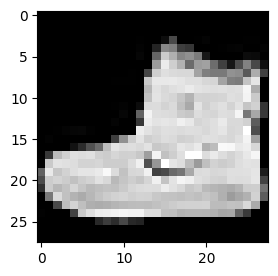

 the label is :  0


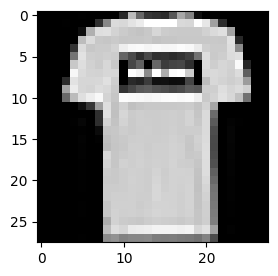

 the label is :  0


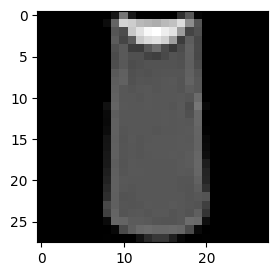

 the label is :  3


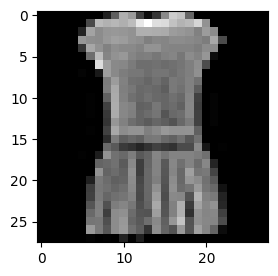

 the label is :  0


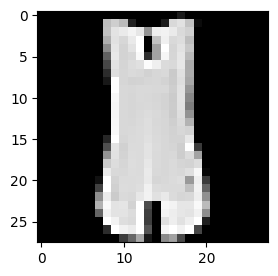

In [4]:
for i in range (0,5):
    plt.figure(figsize = (3,3))
    img = x_train[i]
    plt.imshow(img,cmap="gray")
    print(" the label is : ",y_train[i])
    plt.show()



In [5]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))
input_shape = (28,28,1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
print('x_train shape',x_train.shape)
print('Number of images in x_train' , x_train.shape[0])
print('Number of images in x_test' , x_test.shape[0])

x_train shape (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [7]:
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [8]:
from keras.models import Sequential
from keras.layers import Dense , Conv2D ,Dropout , Flatten , MaxPooling2D
model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128,activation = tf.nn.relu))
model.add(Dropout(0.1))
model.add(Dense(10,activation = tf.nn.softmax))

In [9]:
print(5.0//2)

2.0


In [10]:
model.compile(optimizer = 'adam' , 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x=x_train,y=y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4100 - accuracy: 0.8535
Epoch 2/6
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2763 - accuracy: 0.8995
Epoch 3/6
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2301 - accuracy: 0.9155
Epoch 4/6
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1939 - accuracy: 0.9280
Epoch 5/6
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1688 - accuracy: 0.9373
Epoch 6/6
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1476 - accuracy: 0.9453


In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2718 - accuracy: 0.9110


[0.2717598080635071, 0.9110000133514404]

In [12]:
predictions = model.predict(x_test)
print(predictions)

313/313 [==============================] - 1s 4ms/step
[[6.77858270e-10 6.01602823e-10 3.84820176e-10 ... 3.74115043e-05
  2.17467289e-09 9.99962449e-01]
 [3.56208126e-04 1.60586605e-13 9.99640346e-01 ... 9.52814665e-19
  6.33579994e-13 9.29899451e-16]
 [2.15967882e-13 1.00000000e+00 3.95841239e-15 ... 1.91341084e-23
  2.77818658e-20 1.13890056e-20]
 ...
 [5.94146968e-07 1.34394937e-12 1.21925877e-05 ... 1.13683001e-10
  9.99937654e-01 1.51821318e-12]
 [1.27290678e-10 9.99999881e-01 2.62067993e-12 ... 7.09674048e-17
  5.25920639e-16 3.05347991e-14]
 [5.91062344e-05 3.31694428e-05 4.27443243e-04 ... 1.37305784e-03
  1.35743976e-04 2.37210203e-04]]


In [13]:
print(predictions[0])

[6.77858270e-10 6.01602823e-10 3.84820176e-10 1.12820475e-10
 3.79720595e-11 9.05706372e-08 1.96918398e-10 3.74115043e-05
 2.17467289e-09 9.99962449e-01]


1/1 [==============================] - 0s 25ms/step
[[4.4114201e-09 1.7538974e-10 1.5065035e-08 4.9801789e-09 1.5705395e-12
  9.7459906e-06 1.5096144e-10 9.9999022e-01 7.3222393e-09 3.4396301e-09]]


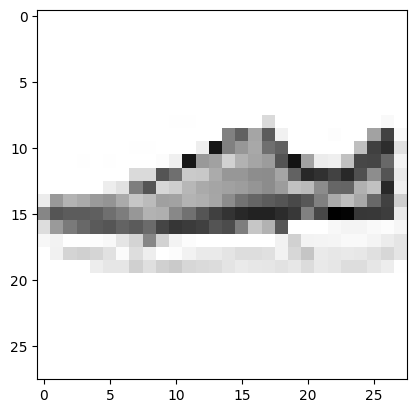

In [14]:
image_index = 9
plt.imshow(x_test[image_index].reshape(28,28),cmap ='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print(pred)

In [15]:
p = pred.argmax()
D= {0:'T-shirt' , 1:'Trouser' , 2:'Pull Over' , 3:'Dress' , 4:'Coat' , 5:'Snadals' , 6:'Shirt' , 7:'Sneakers' , 8:'Bag' , 9:'Ankle Boots'}
print('Expected answer :' , D[p])
st1 = D[p]
print('Actual Answer' , D[y_test[image_index]])
st2 = D[y_test[image_index]]

Expected answer : Sneakers
Actual Answer Sneakers


In [16]:
if(st1 == st2):print("matched")
else:print("unmatched")


matched
